# Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The dependent variable (DV) is a True or False value regarding if the words shown were congruent (the word shown is the name of the color of the word shown) or incongruent (the word shown is the name of a different color than the color of the word shown).

The independent variable (IV) is the time it took for every participant on the test to say the colors of the words readed.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null Hypothesis (H0): There is no meaningful statistical difference in the time it takes for the participants to complete the task with congruent words or incongruent words.

Alternative Hypothesis (H1): There is a meaningful difference in the time it takes for the participants to complete the task with congruent words or incongruent words.

The statistical test to perform in order to validate one hypothesis is a Paired t-test, because according to http://support.minitab.com [1], it "tests whether the mean of the differences between dependent or paired observations is equal to a target value".

To perform a t-test there are two main conditions to be met:

Condition 1: The data were collected in a random way, each observation must be independent of the others.

Condition 2: The sampling distribution must be normal or approximately normal.

Condition 1 is met by the way the data was collected.
We will later in this document review if the condition 2 is met by ploting the data distribution and comparing it to a normal distribution.

The resulting p-value related to the paired t-test is a value between 0 and 1 that means the probability of not rejecting H0.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('stroopdata.csv')
print(data)
data.describe()

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The table above, made using the function describe "generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values" [2]

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

For congruent word's normalized time distribution: 
 mu = 14.05 and sigma = 3.48

For incongruent word's time distribution: 
 mu = 22.02 and sigma = 4.70



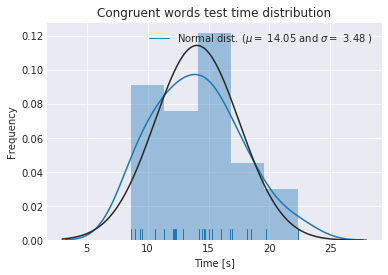

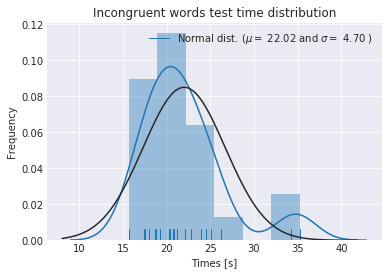

In [4]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
(mu1, sigma1) = norm.fit(data.Congruent)
print( "For congruent word's normalized time distribution: \n mu = {:.2f} and sigma = {:.2f}\n".format(mu1, sigma1))
(mu2, sigma2) = norm.fit(data.Incongruent)
print( "For incongruent word's time distribution: \n mu = {:.2f} and sigma = {:.2f}\n".format(mu2, sigma2))

ax = sns.distplot(data.Congruent , fit=norm, rug = True)
plt.title('Congruent words test time distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)], loc='best')
plt.ylabel('Frequency')
plt.xlabel('Time [s]')
plt.show()

ax2 = sns.distplot(data.Incongruent , fit=norm, rug = True)
plt.title('Incongruent words test time distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu2, sigma2)], loc='best')
plt.ylabel('Frequency')
plt.xlabel('Times [s]')
plt.show()

As we can see in both plots, the data is approximately normally distributed, and therefore the t-test Condition 2 is met.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [13]:
stats.ttest_rel(data.Congruent, data.Incongruent)
tvalue = stats.ttest_rel(data.Congruent, data.Incongruent)[0]
pvalue = stats.ttest_rel(data.Congruent, data.Incongruent)[1]
print("The t-value for a paired t-test is:{}".format(tvalue))
print("The p-value for a paired t-test is:{}".format(pvalue))

The t-value for a paired t-test is:-8.020706944109957
The p-value for a paired t-test is:4.103000585711178e-08


The t-value for a paired t-test on the given data is equal to 8.021.

The p-value for a paired t-test on the given data is equal to 4.103e-08. 

What the p-value means is that only 4.103e-06 % of the times that we perform the same Stroop effect test the null hypothesis (H0) would be true.

Said that, we can safely say that there is indeed a difference in the time it takes to complete the test with congruent words and to complete the test with incongruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

### References:

[1] Paired t-test description. Source: http://www.minitab.com/es-mx/support/

[2] pd.describe() function description. Source: https://pandas.pydata.org/

[3] Graph inspirated in Kaggle platform Kernel. Source: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

